<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [3]:
model = Sequential()
model.add(Dense(10, input_dim=13, activation='relu'))
model.add(Dense(1, activation='linear'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [6]:
stop = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=3)

In [7]:
model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[stop])

Train on 404 samples, validate on 102 samples
Epoch 1/1000
404/404 [==============================] - 0s 827us/sample - loss: 14211.9419 - val_loss: 11738.6088
Epoch 2/1000
404/404 [==============================] - 0s 66us/sample - loss: 9082.0765 - val_loss: 7287.1563
Epoch 3/1000
404/404 [==============================] - 0s 76us/sample - loss: 5524.0660 - val_loss: 4354.4045
Epoch 4/1000
404/404 [==============================] - 0s 71us/sample - loss: 3251.6329 - val_loss: 2464.9421
Epoch 5/1000
404/404 [==============================] - 0s 71us/sample - loss: 1831.7303 - val_loss: 1376.6206
Epoch 6/1000
404/404 [==============================] - 0s 76us/sample - loss: 1037.3342 - val_loss: 814.7824
Epoch 7/1000
404/404 [==============================] - 0s 81us/sample - loss: 655.7459 - val_loss: 538.8914
Epoch 8/1000
404/404 [==============================] - 0s 71us/sample - loss: 474.1028 - val_loss: 422.7641
Epoch 9/1000
404/404 [==============================] - 0s 77us/samp

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [8]:
##### Your Code Here #####

from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(1280, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
stop = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=3)
model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test), callbacks=[stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 11s 186us/sample - loss: 4.7101 - accuracy: 0.7831 - val_loss: 0.6079 - val_accuracy: 0.7978
Epoch 2/100
60000/60000 [==============================] - 11s 178us/sample - loss: 0.5027 - accuracy: 0.8269 - val_loss: 0.5111 - val_accuracy: 0.8313
Epoch 3/100
60000/60000 [==============================] - 10s 175us/sample - loss: 0.5116 - accuracy: 0.8277 - val_loss: 0.6707 - val_accuracy: 0.8169
Epoch 4/100
60000/60000 [==============================] - 10s 173us/sample - loss: 0.4958 - accuracy: 0.8336 - val_loss: 0.6431 - val_accuracy: 0.8088
Epoch 5/100
60000/60000 [==============================] - 11s 175us/sample - loss: 0.4923 - accuracy: 0.8352 - val_loss: 0.5498 - val_accuracy: 0.8217


In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1280)              1004800   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                12810     
Total params: 1,017,610
Trainable params: 1,017,610
Non-trainable params: 0
_________________________________________________________________


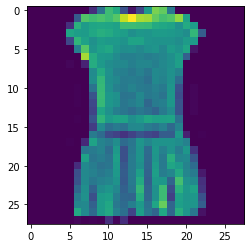

In [11]:
import matplotlib.pyplot as plt
plt.imshow(X_train[3])

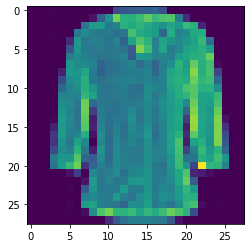

In [21]:
plt.imshow(X_test[4])

In [20]:
img = model.predict(X_test[1])

ValueError: Error when checking input: expected flatten_input to have 3 dimensions, but got array with shape (28, 28)

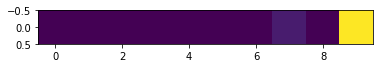

In [19]:
plt.imshow(img)

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.